**Semarang Data Science**
# Machine Learning Introduction
## Titanic Survival Exploration
### Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import visuals as vs

In [2]:
# load dataset
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


From a sample of the RMS Titanic data, we can see the various features present for each passenger on the ship:
- **Survived**: Outcome of survival (0 = No; 1 = Yes)
- **Pclass**: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- **Name**: Name of passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger (Some entries contain NaN)
- **SibSp**: Number of siblings and spouses of the passenger aboard
- **Parch**: Number of parents and children of the passenger aboard
- **Ticket**: Ticket number of the passenger
- **Fare**: Fare paid by the passenger
- **Cabin**: Cabin number of the passenger (Some entries contain NaN)
- **Embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

In [3]:
# label/target
outcomes = df['Survived']

# features data
data = df.drop('Survived', axis=1)
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


To measure the performance of our predictions, we need a metric to score our predictions against the true outcomes of survival. Since we are interested in how accurate our predictions are, we will calculate the proportion of passengers where our prediction of their survival is correct. Run the code cell below to create our *accuracy_score* function and test a prediction on the first five passengers.

In [4]:
def accuracy_score(truth, prediction):
    """ Returns accuracy score for input truth and predictions. """
    
    if len(truth) == len(prediction):
        return "Prediksi memiliki akurasi {:.2f}%".format((truth == prediction).mean()*100)
    else:
        return "Jumlah tidak sesuai!"

In [5]:
# example function `accuracy_score`
predictions = pd.Series(np.ones(5, dtype=int))
truth = outcomes[:5]
print(truth, predictions)

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64 0    1
1    1
2    1
3    1
4    1
dtype: int32


In [6]:
print(accuracy_score(truth, predictions))

Prediksi memiliki akurasi 60.00%


In [7]:
def predictions_0(data):
    """ Model with no features. Always predicts a passenger did not survive. """
    
    predictions = []
    for _, passenger in data.iterrows():
        predictions.append(0)
    return pd.Series(predictions)

# make the predictions
predictions = predictions_0(data)

In [8]:
print(accuracy_score(outcomes, predictions))

Prediksi memiliki akurasi 61.62%


Let's take a look at whether the feature **Sex** has any indication of survival rates among passengers using the *survival_stats* function. This function is defined in the visuals.py Python script included with this project. The first two parameters passed to the function are the RMS Titanic data and passenger survival outcomes, respectively. The third parameter indicates which feature we want to plot survival statistics across.

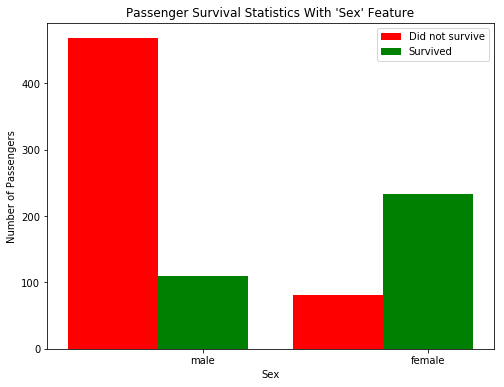

In [9]:
vs.survival_stats(data, outcomes, 'Sex')

In [10]:
def predictions_1(data):
    """ Model with one feature: 
            - Predict a passenger survived if they are female. """
    
    predictions = []
    for _, passenger in data.iterrows():
        # your code
        if passenger['Sex'] == 'female':
            predictions.append(1)
        else:
            predictions.append(0)
        
    return pd.Series(predictions)

# make the predictions
predictions = predictions_1(data)

In [11]:
print(accuracy_score(outcomes, predictions))

Prediksi memiliki akurasi 78.68%


We'll use a fourth parameter to filter out the data so that only passengers with the **Sex** 'male' will be included.

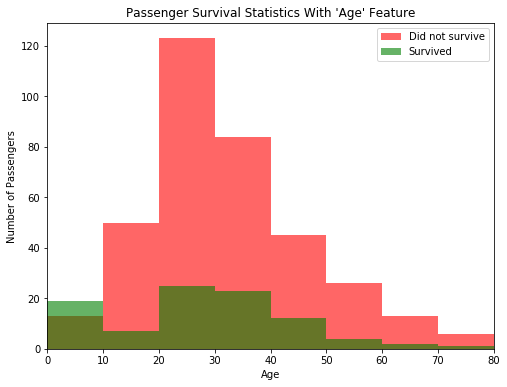

In [12]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'"])

In [13]:
def predictions_2(data):
    """ Model with two features: 
        - Predict a passenger survived if they are female.
        - Predict a passenger survived if they are male and younger than 10. """
    predictions = []
    for _, passenger in data.iterrows():
        # your code
        if passenger['Sex'] == 'female':
            predictions.append(1)
        elif passenger['Sex'] == 'male' and passenger['Age'] < 10:
            predictions.append(1)
        else:
            predictions.append(0)
        
    return pd.Series(predictions)

# make the predictions
predictions = predictions_2(data)

In [14]:
print(accuracy_score(outcomes, predictions))

Prediksi memiliki akurasi 79.35%


In [15]:
def predictions_3(data):
    """ Makes a prediction with an accuracy of at least 80%.  """
    predictions = []
    for _, passenger in data.iterrows():
        # your code
        pass
        
    return pd.Series(predictions)

# make the predictions
predictions = predictions_3(data)

In [16]:
print(accuracy_score(outcomes, predictions))

Jumlah tidak sesuai!


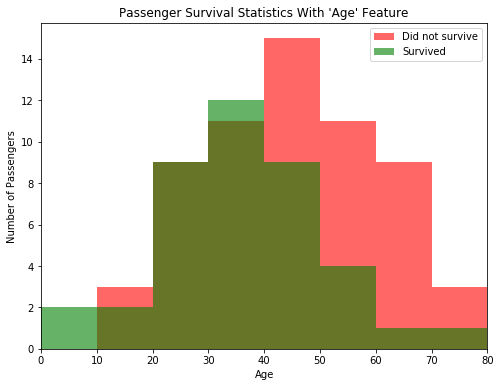

In [17]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'", "Pclass == 1"])

## Conclusion
*Write your conclusion here*

# Logistic Regression

In [37]:
# import libraries from scikit-learn
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()

In [38]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Training Set

In [39]:
train = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


## Data Preprocessing
### Missing Values

In [40]:
# detect missing values NaN
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [41]:
# fill missing values in Age with median
train['Age'] = train['Age'].fillna(train['Age'].median())
train['Age'].isnull().sum()

0

In [42]:
# counts of unique values in Embarked
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [43]:
# fill missing values in Embarked with 'S' (the most appearances in data) 
train['Embarked'] = train['Embarked'].fillna('S')
train['Embarked'].isnull().sum()

0

### Convert string into numeric

In [44]:
# change 'female' = 0, 'male' = 1
train['Sex_num'] = train['Sex'].map({'female':0, 'male':1}).astype(int)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_num
0,1,0,3,male,22.0,1,0,7.2500,S,1
1,2,1,1,female,38.0,1,0,71.2833,C,0
2,3,1,3,female,26.0,0,0,7.9250,S,0
3,4,1,1,female,35.0,1,0,53.1000,S,0
4,5,0,3,male,35.0,0,0,8.0500,S,1


In [45]:
# change 'S' = 0, 'C' = 1, 'Q' = 2
train['Embarked_num'] = train['Embarked'].map({'S':0, 'C':1, 'Q': 2}).astype(int)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_num,Embarked_num
0,1,0,3,male,22.0,1,0,7.2500,S,1,0
1,2,1,1,female,38.0,1,0,71.2833,C,0,1
2,3,1,3,female,26.0,0,0,7.9250,S,0,0
3,4,1,1,female,35.0,1,0,53.1000,S,0,0
4,5,0,3,male,35.0,0,0,8.0500,S,1,0


In [46]:
X_train = train.drop(['Survived', 'Sex', 'Embarked'], axis=1)
y_train = train['Survived']

In [47]:
X_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_num,Embarked_num
0,1,3,22.0,1,0,7.2500,1,0
1,2,1,38.0,1,0,71.2833,0,1
2,3,3,26.0,0,0,7.9250,0,0
3,4,1,35.0,1,0,53.1000,0,0
4,5,3,35.0,0,0,8.0500,1,0


## Train the data

In [29]:
# train the data
log.fit(X_train, y_train)

# note: confidence score generated by the model based on our training dataset
log.score(X_train, y_train)

0.80695847362514028

### Testing Set

In [30]:
df_test = pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [31]:
test = df_test.drop(['Name', 'Ticket', 'Cabin'], axis=1)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [32]:
test.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [33]:
# fill missing values in Age, Fare with median
test['Age'] = test['Age'].fillna(test['Age'].median())
test['Fare'] = test['Fare'].fillna(test['Fare'].median())
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [34]:
# change 'female' = 0, 'male' = 1
test['Sex_num'] = test['Sex'].map({'female':0, 'male':1}).astype(int)

# change 'S' = 0, 'C' = 1, 'Q' = 2
test['Embarked_num'] = test['Embarked'].map({'S':0, 'C':1, 'Q': 2}).astype(int)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_num,Embarked_num
0,892,3,male,34.5,0,0,7.8292,Q,1,2
1,893,3,female,47.0,1,0,7.0000,S,0,0
2,894,2,male,62.0,0,0,9.6875,Q,1,2
3,895,3,male,27.0,0,0,8.6625,S,1,0
4,896,3,female,22.0,1,1,12.2875,S,0,0


In [35]:
X_test = test.drop(['Sex', 'Embarked'], axis=1)
X_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_num,Embarked_num
0,892,3,34.5,0,0,7.8292,1,2
1,893,3,47.0,1,0,7.0000,0,0
2,894,2,62.0,0,0,9.6875,1,2
3,895,3,27.0,0,0,8.6625,1,0
4,896,3,22.0,1,1,12.2875,0,0


## Predict the data

In [36]:
# predict y_test (target/label) from X_test
y_test = log.predict(X_test)
print(y_test)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 1 1 1 1 1 1 0 1 0 0 0]
